## Download dữ liệu phân bón từ google drive về

In [1]:
#Download dữ liệu phân bón dried (bao gồm gia súc và gia cầm)
!gdown --id 1Jqb1nXv-fNqXGYxsShfSdvm0F2kabNhW
#Download dữ liệu phân bón fresh (bao gồm gia súc và gia cầm)
!gdown --id 1Us68Nzzafwr1VPsYnYv-cEJZBmNJ3Ji3
#Download dữ liệu thành phần hóa học của phân bón
!gdown --id 1qdONOOyIcmJfR1vZSaGzIvHtyTg7ShfP

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Jqb1nXv-fNqXGYxsShfSdvm0F2kabNhW
To: /content/spectra_DG_Abs_STD_1100_2498nm_STD.xlsx
100% 1.61M/1.61M [00:00<00:00, 184MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Us68Nzzafwr1VPsYnYv-cEJZBmNJ3Ji3
To: /content/spectra_FH_Abs_STD_1100_2498nm_STD.xlsx
100% 2.17M/2.17M [00:00<00:00, 88.6MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings

## Trực quan dữ liệu phổ NIR

In [2]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [3]:
file_paths = [
    "/content/spectra_DG_Abs_STD_1100_2498nm_STD.xlsx",
    "/content/spectra_FH_Abs_STD_1100_2498nm_STD.xlsx",
    "/content/chemical_analysis.xlsx"
]

dried_spectra_df = pd.read_excel(file_paths[0])
fresh_spectra_df = pd.read_excel(file_paths[1])
chemical_df = pd.read_excel(file_paths[2])

In [4]:
dried_spectra = dried_spectra_df.values[:,1:]
fresh_spectra = fresh_spectra_df.values[:,1:]

In [5]:
def visualize_spectra(matrix,title):
    num_lines = matrix.shape[0]  # Số đường trên đồ thị
    plt.figure(figsize=(6, 3))
    # Vẽ đồ thị
    for i in range(num_lines):
        plt.plot(matrix[i, :])

    plt.xlabel('Wavelength')  # Nhãn trục X
    plt.ylabel('Reflectance')  # Nhãn trục Y
    plt.title(title)  # Tiêu đề đồ thị

    plt.show()  # Hiển thị đồ thị

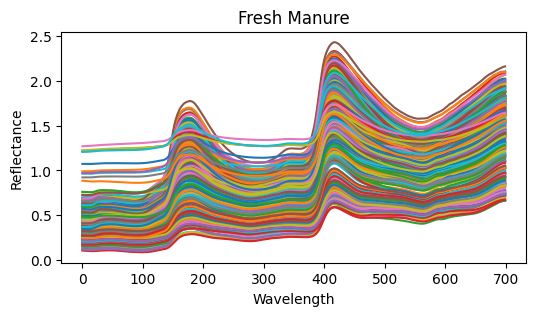

In [6]:
visualize_spectra(fresh_spectra,'Fresh Manure')

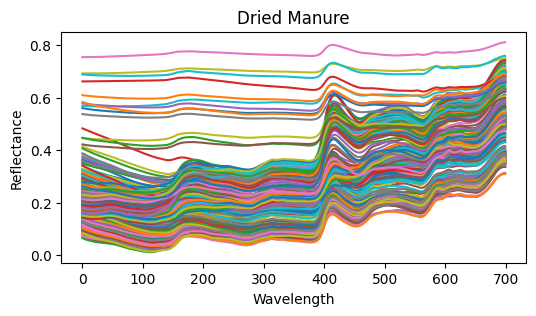

In [7]:
visualize_spectra(dried_spectra,'Dried Manure')

## Đưa về bảng dữ liệu chứa đầy đủ thông tin hơn

In [8]:
type_manure_df = chemical_df[['type_manure']]
# Tạo danh sách chứa 332 phần tử 'Dried'
data_dried = ['Dried'] * 332

# Chuyển danh sách thành DataFrame
df_dried = pd.DataFrame(data_dried, columns=['Dried or Fresh'])

# Tạo danh sách chứa 332 phần tử 'Fresh'
data_fresh = ['Fresh'] * 332

# Chuyển danh sách thành DataFrame
df_fresh = pd.DataFrame(data_fresh, columns=['Dried or Fresh'])

merge_dried_df = pd.concat([dried_spectra_df, df_dried, type_manure_df], axis=1)
merge_fresh_df = pd.concat([fresh_spectra_df, df_fresh, type_manure_df], axis=1)

df_all = pd.concat([merge_dried_df,merge_fresh_df])

df_all['Class'] = df_all['Dried or Fresh'] + '-' + df_all['type_manure']


In [9]:
Spectra_data = df_all.drop(['sample_name','Dried or Fresh','type_manure','Class'],axis = 1).values

In [10]:
df_all

,sample_name,1100_nm,1102_nm,1104_nm,1106_nm,1108_nm,1110_nm,1112_nm,1114_nm,1116_nm,...,2486_nm,2488_nm,2490_nm,2492_nm,2494_nm,2496_nm,2498_nm,Dried or Fresh,type_manure,Class
0,FBCRIF001,0.117115,0.116163,0.115307,0.114564,0.113552,0.112556,0.111460,0.110673,0.110249,...,0.357876,0.359046,0.359973,0.360660,0.361052,0.361174,0.361169,Dried,cattle manure,Dried-cattle manure
1,FBCRIF002,0.127267,0.126541,0.125739,0.125051,0.124148,0.123225,0.122289,0.121577,0.121105,...,0.367408,0.368604,0.369494,0.370083,0.370328,0.370269,0.370059,Dried,cattle manure,Dried-cattle manure
2,FBCRIF003,0.146101,0.145503,0.144815,0.144060,0.143048,0.142062,0.140952,0.140115,0.139674,...,0.385200,0.386232,0.387005,0.387527,0.387755,0.387724,0.387581,Dried,cattle manure,Dried-cattle manure
3,FBCRIF004,0.145878,0.145194,0.144455,0.143708,0.142787,0.141831,0.140752,0.139927,0.139478,...,0.376168,0.377350,0.378252,0.378879,0.379182,0.379185,0.379029,Dried,cattle manure,Dried-cattle manure
4,FBCRIF005,0.122828,0.122174,0.121568,0.121049,0.120233,0.119437,0.118623,0.117968,0.117673,...,0.366606,0.367655,0.368422,0.368911,0.369075,0.368951,0.368688,Dried,cattle manure,Dried-cattle manure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,R_FERM_48_FBV_LT,0.921903,0.921882,0.921879,0.921892,0.921893,0.921852,0.921772,0.921675,0.921602,...,1.531451,1.534228,1.537057,1.539675,1.541941,1.544031,1.546002,Fresh,cattle manure,Fresh-cattle manure
328,R_FERM_49_FBV_LT,1.226104,1.226319,1.226631,1.226985,1.227300,1.227568,1.227816,1.228038,1.228266,...,1.565166,1.567635,1.570050,1.572208,1.574032,1.575824,1.577748,Fresh,cattle manure,Fresh-cattle manure
329,R_FERM_50_FBV_LT,1.208262,1.208337,1.208493,1.208694,1.208869,1.208999,1.209085,1.209125,1.209165,...,1.793536,1.796581,1.799726,1.802921,1.805966,1.809047,1.812130,Fresh,cattle manure,Fresh-cattle manure
330,R_FERM_69_FBV,0.571057,0.570358,0.569508,0.568678,0.567928,0.567190,0.566426,0.565650,0.564924,...,1.556775,1.559369,1.561662,1.563666,1.565651,1.567573,1.569299,Fresh,cattle manure,Fresh-cattle manure


In [11]:
#poultry manure: 181 -> 316
#cattle manure: 1 -> 180 ; 317-> 332

Class = df_all[['Class']].values
# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Thực hiện mã hóa nhãn
encoded_classes = label_encoder.fit_transform(Class)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
print("Số mẫu: ",Spectra_data.shape[0])
print("Số chiều vector phổ NIR: ",Spectra_data.shape[1])

Số mẫu:  664
Số chiều vector phổ NIR:  700


## Mô hình phân loại 4 class: Dried Cattle , Dried Poultry, Fresh Cattle, Fresh Poultry

### MLP

In [13]:
from sklearn.preprocessing import OneHotEncoder

# Khởi tạo bộ mã hóa OneHotEncoder
encoder = OneHotEncoder(categories='auto')

# Thực hiện one-hot encoding
encoded_classes = encoder.fit_transform(encoded_classes.reshape(-1, 1)).toarray()

# In one-hot encoding
print(encoded_classes)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


### CNN (Pseudo-image + TeaNet/TeaResNet)

#### TeaNet

In [14]:
import tensorflow as tf

def vector_to_matrix(vector):
  matrix = np.dot(vector.T,vector)
  matrix = tf.convert_to_tensor(matrix)
  H = vector.shape[1]
  W = vector.shape[1]
  matrix = tf.reshape(matrix, (1, H, W, 1))
  return matrix
def extract_to_pseudo_image2(spectra_data):
  extract_matrix = vector_to_matrix(spectra_data[0:1,:])
  print(extract_matrix.shape)
  for i in range(1,spectra_data.shape[0]):
    extract_matrix = tf.concat((extract_matrix, vector_to_matrix(spectra_data[i:i+1,:])), axis=0)
  # extract_matrix = extract_matrix.astype(float)
  return extract_matrix

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Spectra_data, encoded_classes, test_size=0.3, random_state=2)

In [18]:
X_train = extract_to_pseudo_image2(X_train)
X_test = extract_to_pseudo_image2(X_test)

(1, 700, 700, 1)
(1, 700, 700, 1)


In [19]:
X_train.shape

TensorShape([464, 700, 700, 1])

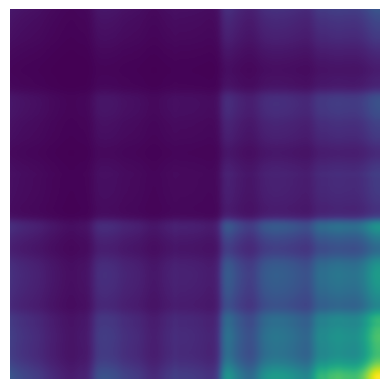

In [20]:
# Hiển thị hình ảnh từ tensor
plt.imshow(X_train[4,:,:,:])
plt.axis('off')
plt.show()

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Input

def TeaNet():

  inputs = Input(shape=(700, 700, 1))
  x = layers.Conv2D(kernel_size=3, filters=16, padding="same")(inputs)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.Conv2D(kernel_size=3, filters=32, padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.Conv2D(kernel_size=3, filters=64, padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(4, activation='softmax')(x)

  model = Model(inputs=inputs, outputs=x)
  return model

In [25]:
model_TeaNet = TeaNet()

#### TeaResNet

In [26]:
def residual_block(x, filters):

  x1 = layers.Conv2D(kernel_size=1, filters=filters, padding="same")(x)
  x1 = layers.BatchNormalization()(x1)

  x2 = layers.Conv2D(kernel_size=3, filters=filters, padding="same")(x)
  x2 = layers.BatchNormalization()(x2)
  x2 = layers.ReLU()(x2)
  x2 = layers.Conv2D(kernel_size=3, filters=filters, padding="same")(x2)
  x2 = layers.BatchNormalization()(x2)

  out = layers.Concatenate()([x1, x2])
  out = layers.ReLU()(out)

  return out

def TeaResnet():

  inputs = Input(shape=(700, 700, 1))
  x = residual_block(inputs,16)
  x = residual_block(x,32)
  x = residual_block(x,64)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(4, activation='softmax')(x)

  model = Model(inputs=inputs, outputs=x)
  return model

In [27]:
model_TeaResnet = TeaResnet()

In [29]:
model_TeaNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

model_TeaNet.fit(X_train, y_train, epochs=1000,batch_size = 1,validation_data=(X_test, y_test))

Epoch 1/1000
464/464 [==============================] - 34s 58ms/step - loss: 1.1133 - accuracy: 0.5862 - val_loss: 1.3487 - val_accuracy: 0.4900
Epoch 2/1000
464/464 [==============================] - 25s 53ms/step - loss: 0.8756 - accuracy: 0.7737 - val_loss: 3.1212 - val_accuracy: 0.3050
Epoch 3/1000
464/464 [==============================] - 24s 52ms/step - loss: 0.7804 - accuracy: 0.8168 - val_loss: 4.0846 - val_accuracy: 0.2700
Epoch 4/1000
464/464 [==============================] - 24s 52ms/step - loss: 0.7037 - accuracy: 0.8147 - val_loss: 3.6456 - val_accuracy: 0.3300
Epoch 5/1000
464/464 [==============================] - 24s 52ms/step - loss: 0.6340 - accuracy: 0.8534 - val_loss: 3.7511 - val_accuracy: 0.3900
Epoch 6/1000
464/464 [==============================] - 27s 57ms/step - loss: 0.5946 - accuracy: 0.8534 - val_loss: 3.8124 - val_accuracy: 0.4200
Epoch 7/1000
464/464 [==============================] - 27s 57ms/step - loss: 0.5476 - accuracy: 0.8664 - val_loss: 3.8972 -

KeyboardInterrupt: ignored